<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 1 : Chargement des données</span></H2>
</center>

In [9]:
import pandas as pd
# 1. Importer les données à l'aide de la bibliothèque Pandas.
df = pd.read_csv("assurance-maladie-68d92978e362f464596651.csv")

# 2. Vérifier le type et la structure des colonnes.

# Informations générales sur le dataset
print(df.info())

# Dimensions du dataset
print("Nombre de lignes et colonnes :", df.shape)

# Vérifier les types et un aperçu rapide
print(df.dtypes)

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Nombre de lignes et colonnes : (1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 2 : Analyse exploratoire des données (EDA)</span></H2>
</center>

🔹 Sous-tâche 1 : Comprendre la structure générale


In [10]:
# Dimensions du dataset
print("Dimensions :", df.shape)

# Types de colonnes
print("Types de données :\n", df.dtypes)

# Aperçu des premières lignes
print(df.head())

Dimensions : (1338, 7)
Types de données :
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


🔹 Sous-tâche 2 : Analyse descriptive

In [12]:
# Dimensions du dataset
print("Dimensions :", df.shape)

# Types de colonnes
print("Types de données :\n", df.dtypes)

# Aperçu des premières lignes
print(df.head())

# ---- Variables numériques ----
print("Statistiques générales (numériques) :")
print(df.describe())   # Moyenne, écart-type, min, max, quartiles

# Médianes
print("\nMédianes des variables numériques :")
print(df.median(numeric_only=True))

# ---- Variables catégorielles ----
print("\nFréquences des variables catégorielles :")
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print(f"\nVariable : {col}")
    print(df[col].value_counts())
    print("-"*40)


Dimensions : (1338, 7)
Types de données :
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Statistiques générales (numériques) :
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.40

🔹 Sous-tâche 3  :Identifier les valeurs manquantes et les doublons.

In [8]:
print("===== Vérification des valeurs manquantes =====\n")
print(df.isnull().sum())   # nombre de valeurs manquantes par colonne

print("\n===== Vérification des doublons =====\n")
nb_duplicated = df.duplicated().sum()
print(f"Nombre de doublons : {nb_duplicated}")

===== Vérification des valeurs manquantes =====

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

===== Vérification des doublons =====

Nombre de doublons : 1


🔹 Sous-tâche 4  :Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn)

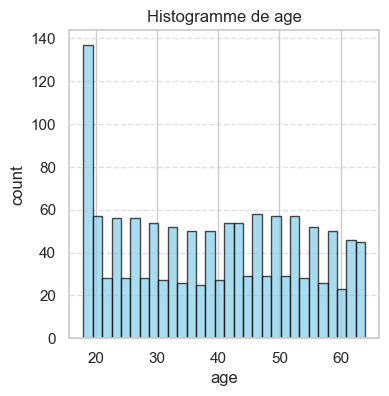

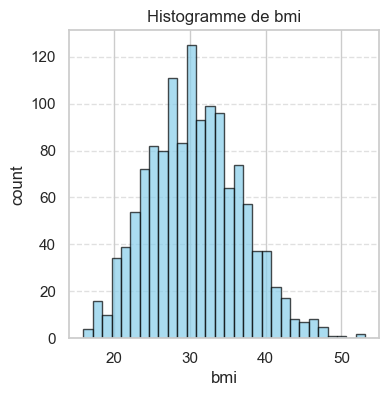

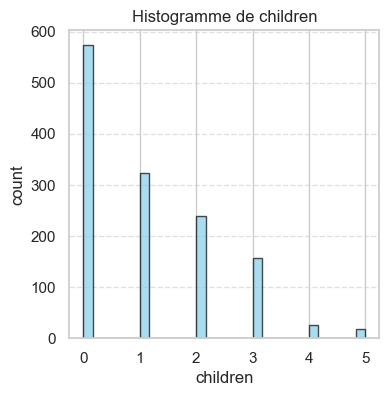

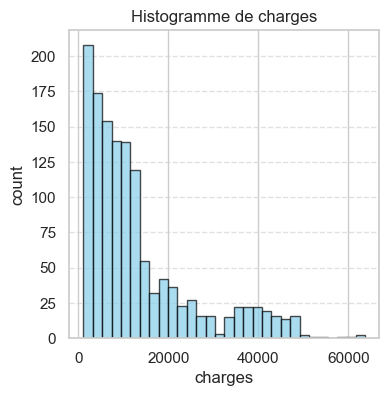

In [13]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(4,4))
    plt.hist(df[col].dropna(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

🔹 Sous-tâche 5  :Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations (ex. : pairplots ou heatmaps).

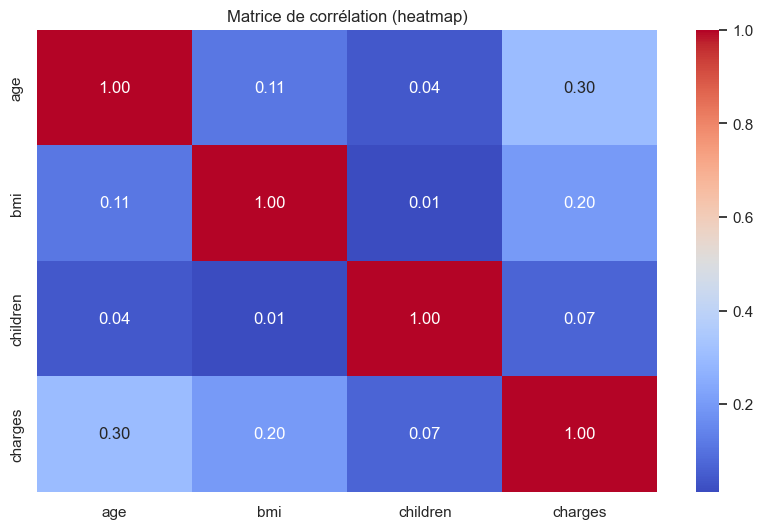

In [22]:
# Calcul de la matrice de corrélation
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matrice de corrélation (heatmap)")
plt.show()

<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 3 : Prétraitement des données</span></H2>
</center>

🔹 Sous-tâche 1: Gestion des valeurs manquantes

In [43]:

cat = df.select_dtypes(include=["object", "category"]).columns

# Calcul de la médiane pour les colonnes numériques
print("Médianes des colonnes numériques :")
for col in numeric_cols:
    median = df[col].median()
    print(f"{col} : {median}")

# Calcul du mode pour les colonnes catégoriques
print("\nModes des colonnes catégoriques :")
for col in cat:
    mode = df[col].mode()[0]
    print(f"{col} : {mode}")

display(df[df.duplicated(keep=False)].head(5))


# Remplacer les valeurs manquantes par la médiane
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"{col} : valeurs manquantes remplacées par la médiane ({median_value})")


# Remplacer les valeurs manquantes par le mode
for col in cat:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"{col} : valeurs manquantes remplacées par le mode ({mode_value})")

print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())


Médianes des colonnes numériques :
age : 39.0
bmi : 30.4
children : 1.0
charges : 9382.033

Modes des colonnes catégoriques :
sex : male
smoker : no
region : southeast


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


age : valeurs manquantes remplacées par la médiane (39.0)
bmi : valeurs manquantes remplacées par la médiane (30.4)
children : valeurs manquantes remplacées par la médiane (1.0)
charges : valeurs manquantes remplacées par la médiane (9382.033)
sex : valeurs manquantes remplacées par le mode (male)
smoker : valeurs manquantes remplacées par le mode (no)
region : valeurs manquantes remplacées par le mode (southeast)

Valeurs manquantes après imputation :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\salma\AppData\Local\Temp\ipykernel_23236\493867915.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\salma\AppData\Local\Temp\ipykernel_23236\493867915.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

🔹 Sous-tâche 2  :Suppression des doublons

In [44]:
# Supprimer les doublons exacts et garder la première occurrence
df_clean = df.drop_duplicates(keep='first')


🔹 Sous-tâche 3 :Détection et gestion des valeurs aberrantes .

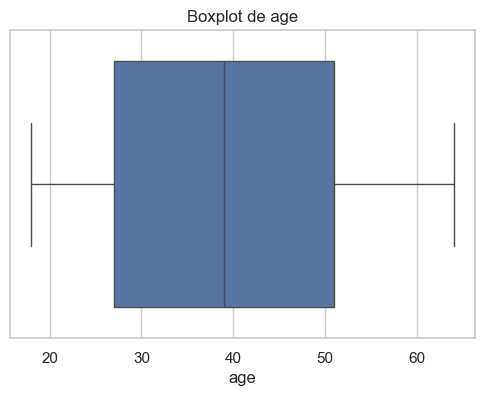

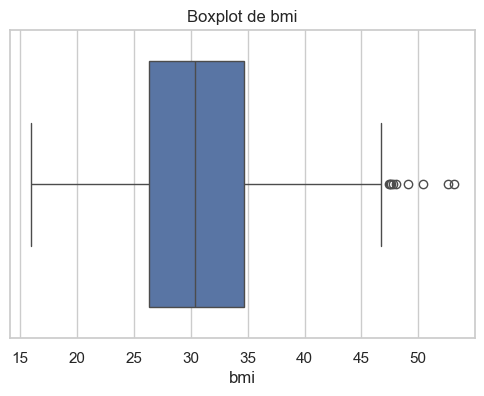

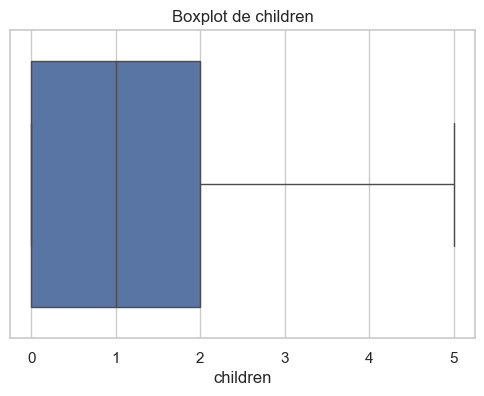

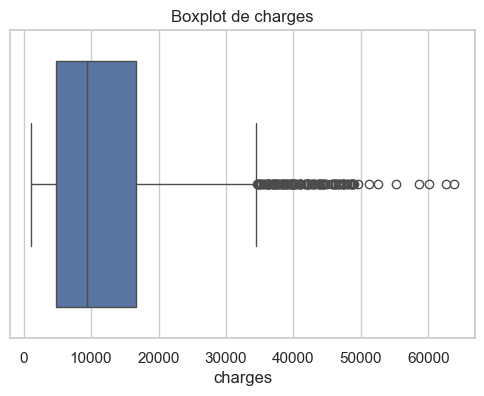

In [45]:
# Visualisation avec boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()



age : 0 valeurs aberrantes détectées
bmi : 9 valeurs aberrantes détectées
children : 0 valeurs aberrantes détectées
charges : 139 valeurs aberrantes détectées


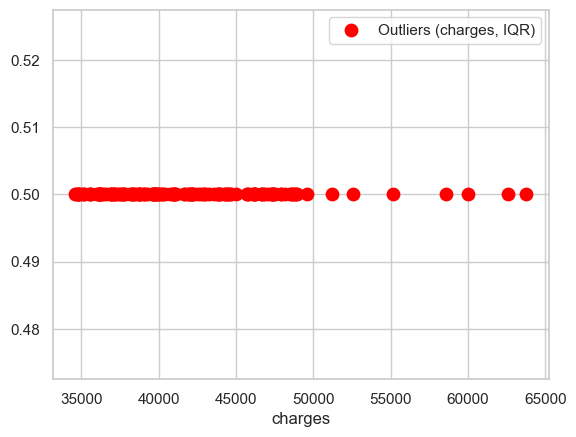

In [ ]:
# IQR method
outliers_iqr = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_iqr[col] = outliers[col].values
    print(f"{col} : {outliers.shape[0]} valeurs aberrantes détectées")

col_to_plot = 'charges'
if len(outliers_iqr[col_to_plot]) > 0:
    plt.scatter(outliers_iqr[col_to_plot], [0.5]*len(outliers_iqr[col_to_plot]), color="red", label=f"Outliers ({col_to_plot}, IQR)", s=80)
    plt.xlabel(col_to_plot)
    plt.legend()
    plt.show()


age : 0 valeurs aberrantes détectées par z-score
bmi : 4 valeurs aberrantes détectées par z-score
children : 18 valeurs aberrantes détectées par z-score
charges : 7 valeurs aberrantes détectées par z-score


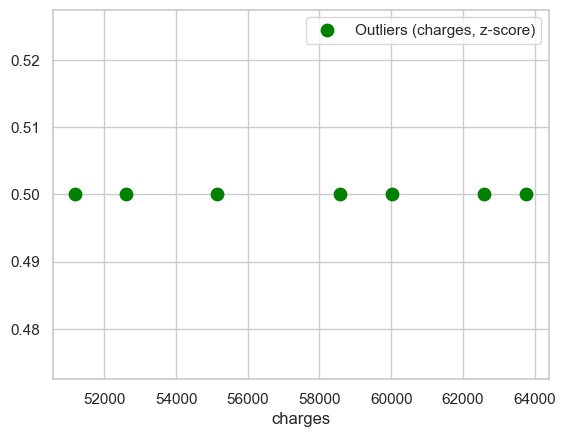

In [ ]:
# z-score > 3
outliers_zscore = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = df[z_scores > 3]
    outliers_zscore[col] = outliers[col].values
    print(f"{col} : {outliers.shape[0]} valeurs aberrantes détectées par z-score")
col_to_plot = 'charges'
if len(outliers_zscore[col_to_plot]) > 0:
    plt.scatter(outliers_zscore[col_to_plot], [0.5]*len(outliers_zscore[col_to_plot]), color="green", label=f"Outliers ({col_to_plot}, z-score)", s=80)
    plt.xlabel(col_to_plot)
    plt.legend()
    plt.show()
    



In [ ]:

# Outliers détectés (stockés dans une variable séparée)
outliers_iqr = df[(df[col] < borne_inf) | (df[col] > borne_sup)]

# Dataset sans outliers
df_iqr_clean = df[(df[col] >= borne_inf) & (df[col] <= borne_sup)]

print("Nombre de valeurs aberrantes (IQR) :", outliers_iqr.shape[0])
print("Taille dataset nettoyé :", df_iqr_clean.shape[0])



Nombre de valeurs aberrantes (IQR) : 139
Taille dataset nettoyé : 1199


🔹 Sous-tâche 4 :Encoder les variables catégoriques (sexe, smoker, région) avec one-hot encoding ou label encoding.

In [71]:
onehot = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print("Shape après One-Hot Encoding :", onehot.shape)
print(onehot.head())

Shape après One-Hot Encoding : (1338, 9)
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


🔹 Sous-tâche 5 :Diviser les données en ensembles d'entraînement et de test (80% / 20%) avec traintestsplit de Scikit-learn

In [73]:
from sklearn.model_selection import train_test_split
X = onehot.drop("charges", axis=1)
y= onehot["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)


X_train : (1070, 8)
X_test  : (268, 8)
y_train : (1070,)
y_test  : (268,)


🔹 Sous-tâche 6 :Normalisation ou standardisation des variables numériques
Normalisation ou standardisation des variables numériques.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols.drop('charges')] = scaler.fit_transform(X[numeric_cols.drop('charges')])
print(X_scaled.head())


        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614     False        True             False   
1 -1.509965  0.509621 -0.078767      True       False             False   
2 -0.797954  0.383307  1.580926      True       False             False   
3 -0.441948 -1.305531 -0.908614      True       False              True   
4 -0.513149 -0.292556 -0.908614      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
